In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


In [4]:
data = pd.read_csv('/Users/jessicakammann/Desktop/Alzheimer2/CompetitingTechnologies/Desktop/ResearchAlzheimers/alzheimers_disease_data.csv')
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [7]:
#print out missing values 
data.isnull().sum().sum()

0

In [8]:
data.shape

(2149, 35)

In [9]:
data = data.iloc[:, 1:34]
data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [10]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Diagnosis', axis=1), data['Diagnosis'], test_size=0.2, random_state=42)
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


KNN Accuracy: 0.7186046511627907
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       277
           1       0.64      0.47      0.54       153

    accuracy                           0.72       430
   macro avg       0.69      0.66      0.67       430
weighted avg       0.71      0.72      0.71       430

[[237  40]
 [ 81  72]]


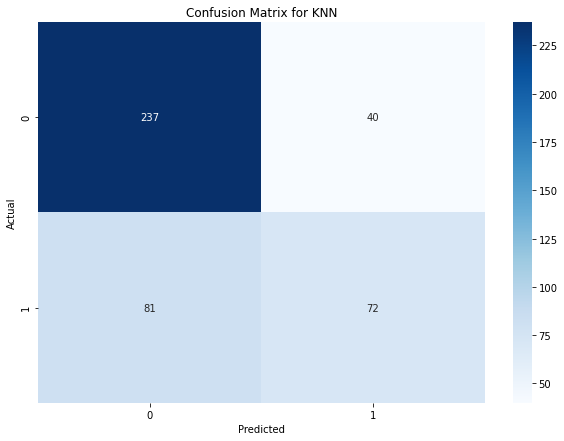

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Accruacy of 71 %, havent done a grid search yet 


Best parameters for KNN: {'n_neighbors': 9}
Best score for KNN: 0.7510017628313783
KNN Accuracy after grid search: 0.7255813953488373
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       277
           1       0.68      0.42      0.52       153

    accuracy                           0.73       430
   macro avg       0.71      0.66      0.67       430
weighted avg       0.72      0.73      0.71       430

[[247  30]
 [ 88  65]]


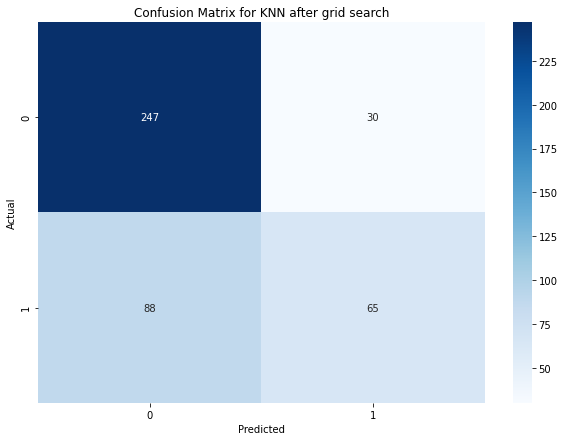

In [16]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11,13,15]
}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_grid.fit(X_train, y_train)
print("Best parameters for KNN:", knn_grid.best_params_)
print("Best score for KNN:", knn_grid.best_score_)
y_pred = knn_grid.predict(X_test)
print("KNN Accuracy after grid search:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN after grid search')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM Accuracy: 0.8209302325581396
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       277
           1       0.78      0.70      0.74       153

    accuracy                           0.82       430
   macro avg       0.81      0.79      0.80       430
weighted avg       0.82      0.82      0.82       430

[[246  31]
 [ 46 107]]


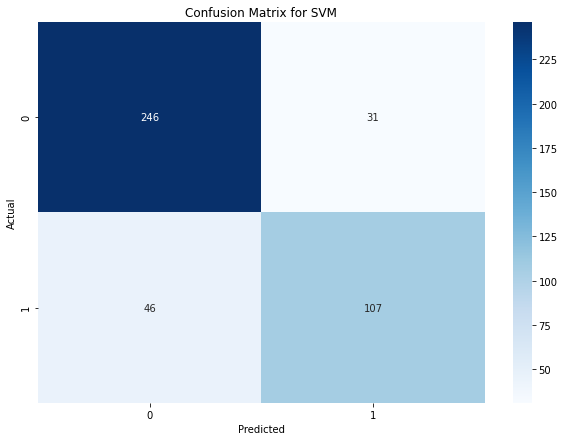

In [ ]:
#SWM
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Accruacy score is 82%

Best parameters for SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
Best score for SVM: 0.8440809546409925
SVM Accuracy after grid search: 0.8209302325581396
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       277
           1       0.78      0.70      0.74       153

    accuracy                           0.82       430
   macro avg       0.81      0.79      0.80       430
weighted avg       0.82      0.82      0.82       430

[[246  31]
 [ 46 107]]


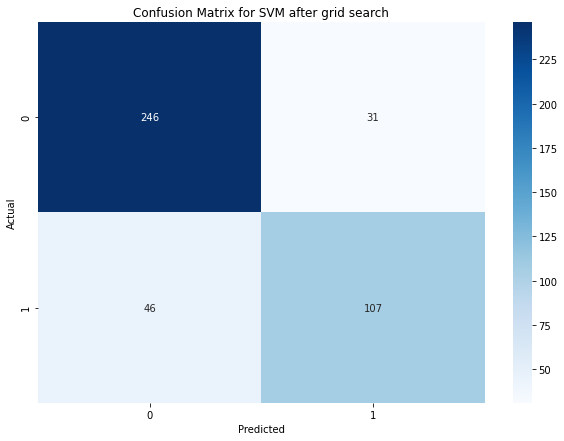

In [ ]:
param_grid = {      
    'C': [0.001,0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['auto', 'scale'],
}
svm_grid = GridSearchCV(SVC(), param_grid, cv=5)
svm_grid.fit(X_train, y_train)
print("Best parameters for SVM:", svm_grid.best_params_)
print("Best score for SVM:", svm_grid.best_score_)
y_pred = svm_grid.predict(X_test)
print("SVM Accuracy after grid search:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM after grid search')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#Accruacy score is still at 82%

Random Forest Accuracy: 0.9255813953488372
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.96      0.82      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.90      0.92       430
weighted avg       0.93      0.93      0.92       430

[[272   5]
 [ 27 126]]


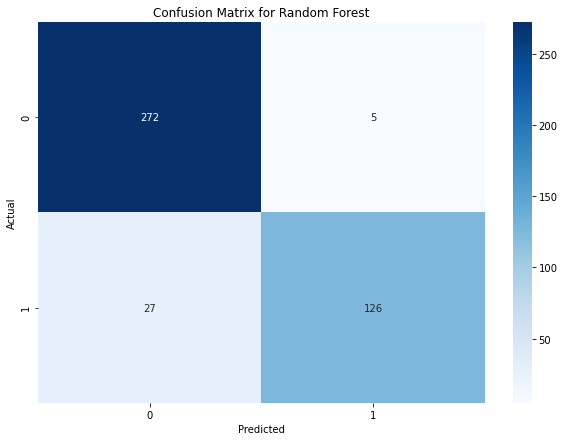

In [ ]:
#Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))        
print(confusion_matrix(y_test, y_pred))
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#Accruacy is at 93% 

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Random Forest: 0.9348379551156011
Random Forest Accuracy after grid search: 0.9325581395348838
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.96      0.84      0.90       153

    accuracy                           0.93       430
   macro avg       0.94      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430

[[272   5]
 [ 24 129]]


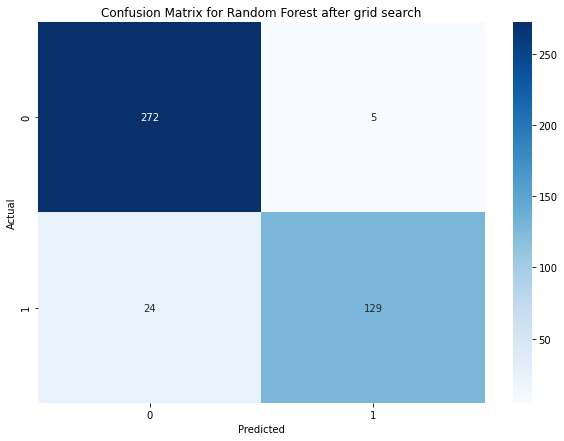

In [22]:
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 10, 20, 30],
'min_samples_split': [2, 5, 10],
}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
rf_grid.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best score for Random Forest:", rf_grid.best_score_)
y_pred = rf_grid.predict(X_test)            
print("Random Forest Accuracy after grid search:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest after grid search')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

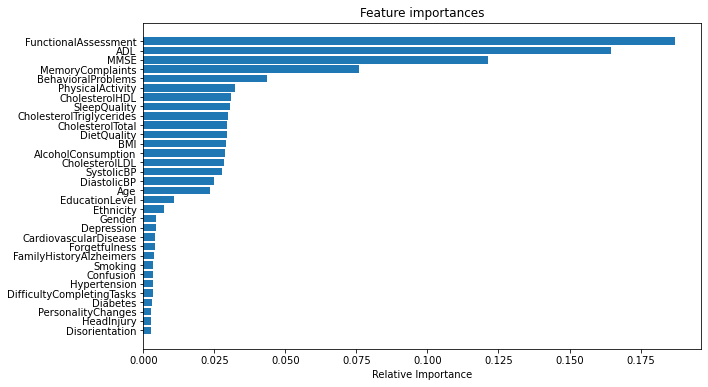

In [ ]:
feature_importances = rf.feature_importances_
feature_names = data.drop('Diagnosis', axis=1).columns
indices = np.argsort(feature_importances)[::1]
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.barh(range(len(feature_importances)), feature_importances[indices], align="center")
plt.yticks(range(len(feature_importances)), feature_names[indices])
plt.xlabel("Relative Importance")
plt.show()
#Functional Assesement most important feature.

Neural Network Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       277
           1       0.72      0.71      0.72       153

    accuracy                           0.80       430
   macro avg       0.78      0.78      0.78       430
weighted avg       0.80      0.80      0.80       430

[[235  42]
 [ 44 109]]


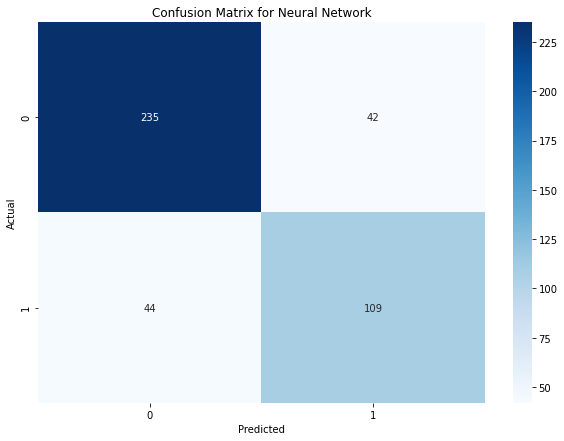

In [29]:
nn= MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred))   
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_m

Best parameters for Neural Network: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (16,)}
Best score for Neural Network: 0.8586327886636382
Neural Network Accuracy after grid search: 0.8395348837209302
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       277
           1       0.80      0.73      0.76       153

    accuracy                           0.84       430
   macro avg       0.83      0.82      0.82       430
weighted avg       0.84      0.84      0.84       430

[[249  28]
 [ 41 112]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


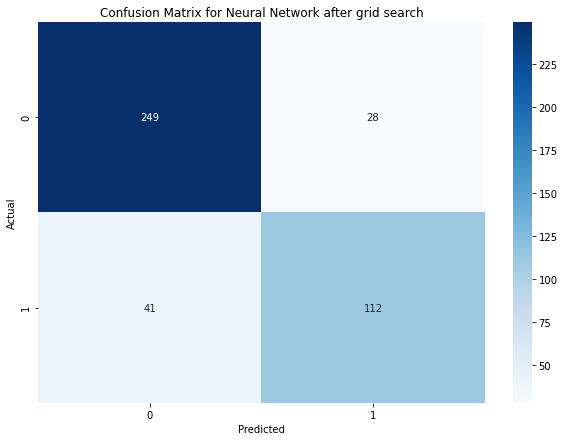

In [33]:
param_grid = {
    'hidden_layer_sizes': [(4,), (16,), (64,),(64,64), (128,128)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
}
nn_grid = GridSearchCV(MLPClassifier(max_iter= 1000), param_grid, cv=5)
nn_grid.fit(X_train, y_train)
print("Best parameters for Neural Network:", nn_grid.best_params_)
print("Best score for Neural Network:", nn_grid.best_score_)
y_pred = nn_grid.predict(X_test)
print("Neural Network Accuracy after grid search:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Neural Network after grid search')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Image Data Classification 

In [52]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())  # Check if CUDA is available (if applicable)

ModuleNotFoundError: No module named 'torch'

In [ ]:
DTYPE = dt.Struct([dt.Field("Values", dt.int32)])
source_dp = FileLister(".", masks="df*.parquet")
parquet_df_dp = source_dp.load_parquet_as_df(dtype=DTYPE)
list(parquet_df_dp)[0]